# OPERATING SYSTEMS COURSEWORK REPORT CAND NO - 262984

# Set Up and Folder Structure

All of the experiments can be run using the run.bat batch script.

The run.bat creates a new directory for each experiment named experiment 1, 2, and 3, this directory contains three subdirectories:

* **inputs** - contains the input data and input parameters for the experiment
* **outputs** - contains the output files from the experiment from each scheduler
* **schedulers** - contains the simulator_parameters files from the experiment from each scheduler

If you'd like to run the Python scripts provided below, please ensure that you have Python installed on your system. You can download and install Python from the official Python website: [python.org/downloads](https://www.python.org/downloads/).

Additionally, these scripts rely on external libraries, namely pandas and matplotlib. You can install these libraries using pip, the Python package installer, by executing the following commands in your terminal or command prompt:


**Terminial commands:**

* `pip install pandas`

* `pip install matplotlib`


# Experiment 1: Comparison of the Average Waiting Time for each Scheduler under a general workload

**Hypothesis:**

In this study, I aim to determine the most effective scheduling for minimising average waiting time. I anticipate that the Shortest Job First with Exponential Averaging algorithm will perform greatly due to its non-preemptive nature.I hypothesise that the FeedbackRR, owing to its preemptive nature and ability to context switch longer processes when they surpass the time quantum, will provide the worst results.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Methodology:**

To assess the average waiting time efficiency of each scheduler, I will conduct the experiment using the run.bat script. This script will execute the experiment for each scheduler. Five different seeds will be selected for each scheduler to ensure stable average waiting time measurements. Inputs generated by the batch file will be stored in ../../../experiment1/inputs/, while the simulator parameters utilised will be stored in ../../../experiment1/schedulers/simulator_parameters/. Outputs will be saved in ../../../experiment1/outputs/scheduler[1...5]/. Subsequently, I will compute the average waiting time across all five seeds for each schedulers and compare the results to determine which scheduler yields the most favourable average waiting time.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Input Parameters:**

* numberOfProcesses=20
* staticPriority=0
* meanInterArrival=150.0
* meanCpuBurst=15.0
* meanIOBurst=15.0
* meanNumberBursts=2.0
* seed=

Seeds used for this Experiments are 502016307473196, 498879433720021, 102564503742932, 789826231112087, and 290826029379601.

These values are the ones I picked for this experiment as this was a good way to represent a "general" workload for the schedulers and I would say that 20 is a decent amount of processes for the schedulers to work with. I made the meanNumberBursts as 2 units which impacts the turnaround time of processes and, consequently, their waiting times. Having the meanCPUBurst and the meanIOBurst allows the processes to spend an equal amount of time executing on the CPU and waiting for I/O operations.

To uphold fairness, seeds are selected randomly. This approach minimises biases and ensures that each trial is treated impartially. It facilitates an objective evaluation of each scheduler's performance under different conditions.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Simulator Parameters:**

* timeLimit=10000
* periodic=false
* interruptTime=5
* timeQuantum=20
* initialBurstEstimate=10
* alphaBurstEstimate=0.5

As observed above, we utilise an interrupt time of 5 unit and a time quantum of 20 units. These values were selected deliberately to compel processes utilising RoundRobin (RR) and Feedback Round Robin (FRR) to undergo context switches, preventing them from consistently running for the entire time quantum. The ratio is 1:4 to minimise excessive overhead in the system, thereby facilitating a fair comparison.

In essence, by adjusting the parameters in a way that gives all schedulers a chance in this experiemnt and employing random seed selection, we enchace the reliability of our results. This methodology enables us to gather insights into which scheduler has the highest and lowest waiting time.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Brief Explanition of the Code below**:

* The `scheduler_types` dictionary maps scheduler numbers to their respective names.

* The `plot_average_waiting_time` function takes two parameters: `file_paths` and `outputs` (used purely for the title of the graphs).

* The `file_paths` is a list of file paths containing the outputs of different schedulers for a specific experiment.

* Outputs is an integer indicating the number of the output being plotted (e.g., Output 1, Output 2, etc.).

* Within the function, it iterates over each file path in `file_paths`, reads the corresponding output file into a DataFrame using `Pandas`, filters out rows with ID 0, calculates the average waiting time for each scheduler in the output file, and appends these average waiting times to the `scheduler_avg_times` dictionary.

* It plots a bar graph showing the average waiting time for each scheduler in the experiment. The title of the graph indicates which output it represents.

* Each bar in the graph represents the average waiting time for a scheduler, and scheduler types are labelled on the x-axis.

* The average waiting time for each scheduler is annotated on top of the corresponding bar in the graph.

* Loops through each scheduler and output index, calls the `plot_average_waiting_time` function, and resets the `file_paths list` for the next iteration.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

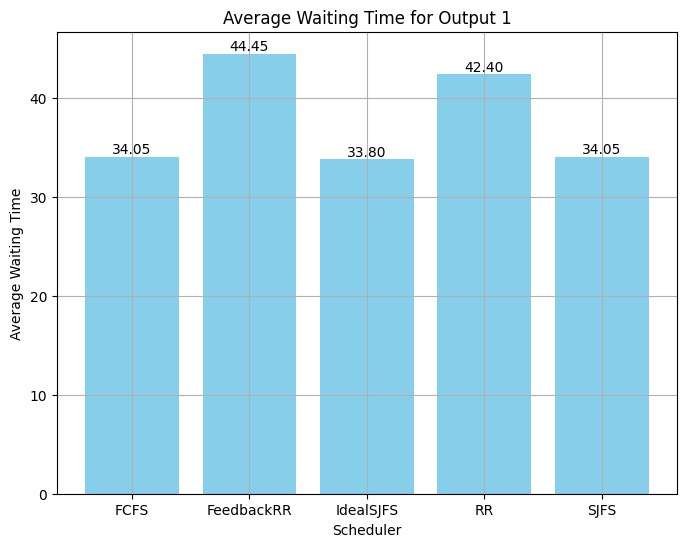

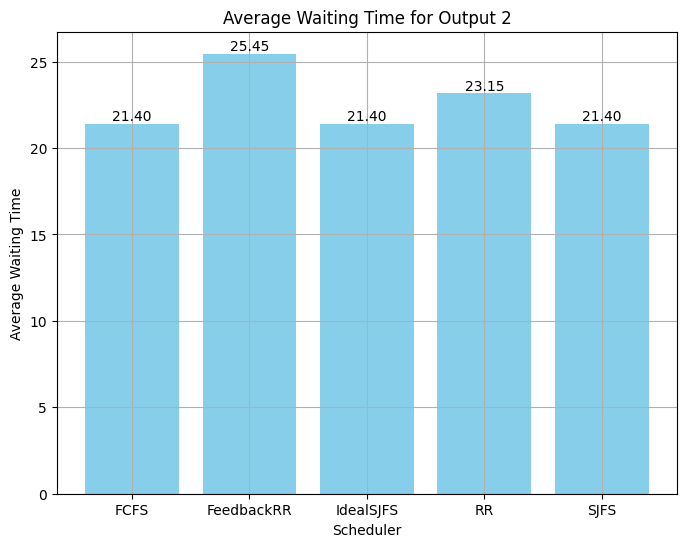

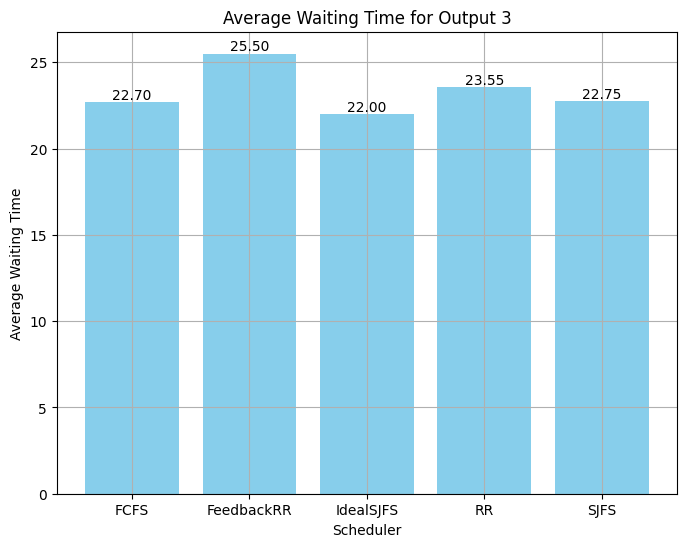

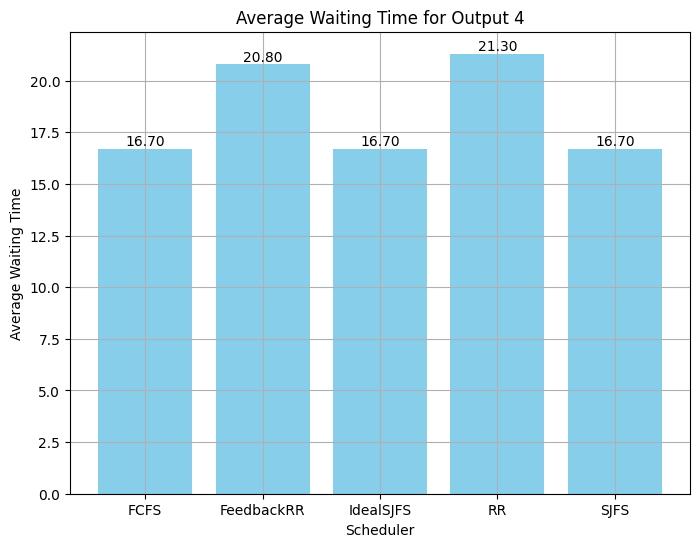

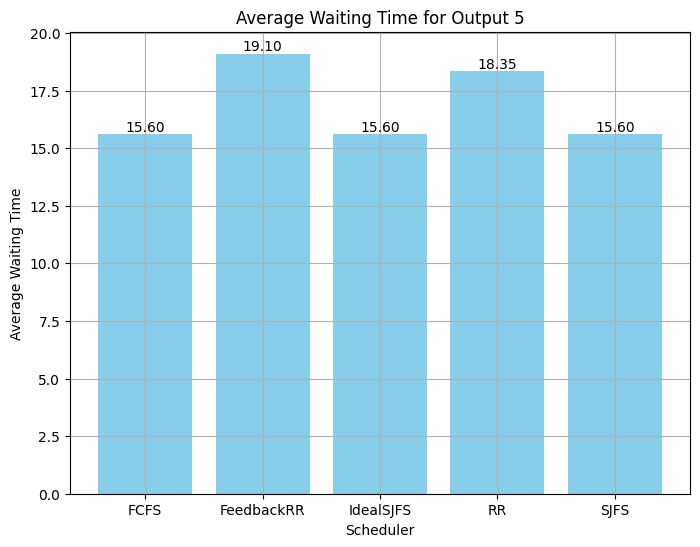

In [1]:
# libaries used throughout the whole report
import pandas as pd
import matplotlib.pyplot as plt
    
scheduler_types = {1: 'FCFS', 2: 'FeedbackRR', 3: 'IdealSJFS', 4: 'RR', 5: 'SJFS'}
scheduler_avg_times = {scheduler_types[i]: [] for i in range(1, 6)}

def plot_average_waiting_time(file_paths, outputs):
    avg_waiting_times = []
    for i, file_path in enumerate(file_paths, start=1):
        data_frame = pd.read_csv(file_path, sep='\t')

        # we don't want to use ID 0 as it's just an idle process
        data_frame_filtered = data_frame[data_frame['id'] != 0]

        avg_waiting_time = data_frame_filtered['waitingTime'].mean()
        avg_waiting_times.append(avg_waiting_time)

        # adds the average waiting time to scheduler_avg_times dictionary so we can use it to calculate the overall mean later 
        scheduler_type = scheduler_types[(i - 1) % 5 + 1]
        scheduler_avg_times[scheduler_type].append(avg_waiting_time)

    # plots the graph
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(scheduler_avg_times) + 1), [avg_waiting_times[i % 5] for i in range(len(scheduler_avg_times))], color='skyblue')
    plt.xlabel('Scheduler')
    plt.ylabel('Average Waiting Time')
    plt.title(f'Average Waiting Time for Output {outputs}')

    plt.xticks(range(1, len(scheduler_avg_times) + 1), [scheduler_types[i] for i in range(1, 6)])
    plt.grid(True)

    # shows the calculated values above the bars
    for i, avg_waiting_time in enumerate(avg_waiting_times):
        plt.text(i + 1, avg_waiting_time, f'{avg_waiting_time:.2f}', ha='center', va='bottom')

    plt.show()


# loops through each scheduler with the paths I have provided
file_paths = []
for i in range(1, 6):
    file_paths.extend([
        f'../../../experiment1/outputs/scheduler1/output{i}.out',
        f'../../../experiment1/outputs/scheduler2/output{i}.out',
        f'../../../experiment1/outputs/scheduler3/output{i}.out',
        f'../../../experiment1/outputs/scheduler4/output{i}.out',
        f'../../../experiment1/outputs/scheduler5/output{i}.out'
    ])

    plot_average_waiting_time(file_paths, i)
    file_paths = []


**Discussion:**

As evident from the preceding example, the wait time on the 2 Shortest Job First schedulers (SJFS and IdealSJFS) are the lowest and the Feedback Round Robin is the highest, followed by the Round Robin (RR). I didn't quite expect the Ideal Shortest Job First and the First Come, First Served schedulers to have pretty similar same average waiting time but that's very intresting to note. I believe this is due to the fact that the processes were coming in Shortest to Longestest meaning that the FCFS would have avoided starvation ensuring that it will have a low  average waiting time.

Now, let's proceed to examine the overall averange waiting time for each scheduler to determine which one has the highest and lowest average waiting time. As hypothesised earlier, I believe that the Shortest Job First Scheduler (SJFS) and the IdealSJFS will have the lowest average waiting times, while the Feedback Round Robin (FeedbackRR) and Round Robin (RR) will have the highest. To calculate the overall average waiting time for each scheduler, I'll use the 5 mean averages for each scheduler shown on the 5 graphs above. Once again, I'll present the results in a bar graph format to make comparison easier.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Brief Explanition of the Code below**:

* The `scheduler_avg_means` is an empty dictionary to store the mean waiting time for each scheduler.

* Calculate average waiting time for each scheduler:

 * Iterates through the dictionary `scheduler_avg_times`, which contains the waiting times for each scheduler across experiments.
 * Computes the average waiting time for each scheduler by summing up the waiting times and dividing by the number of experiments.
 * Stores the computed average waiting time in the `scheduler_avg_means` dictionary.

* Creates a bar graph using `plt.bar()` where each bar represents a scheduler, and the height of the bar represents the mean waiting time.

* Adds labels and title to the graph for clarity.

* Annotates each bar with its corresponding mean waiting time using `plt.text()`.

* Shows the plotted bar graph for the overall average waiting time for each scheduler.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

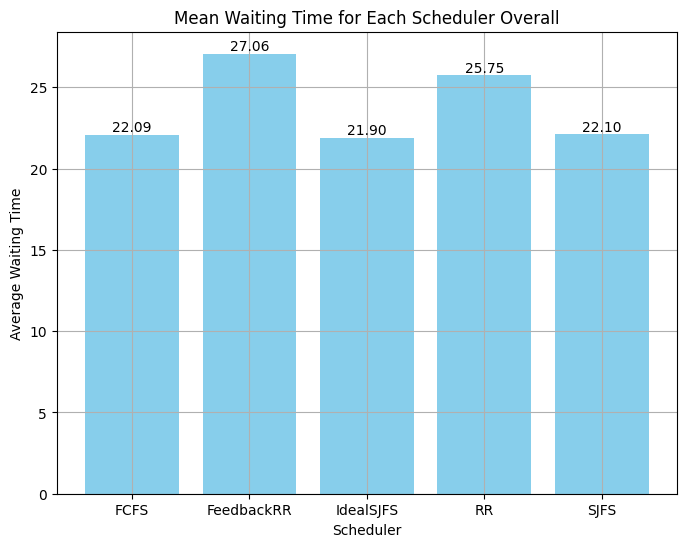

In [2]:
scheduler_avg_means_waiting = {}

# calculates the average waiting time for each scheduler
for scheduler, times in scheduler_avg_times.items():
    avg_time = sum(times) / len(times)
    scheduler_avg_means_waiting[scheduler] = avg_time

# plot the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(scheduler_avg_means_waiting.keys(), scheduler_avg_means_waiting.values(), color='skyblue')
plt.xlabel('Scheduler')
plt.ylabel('Average Waiting Time')
plt.title('Mean Waiting Time for Each Scheduler Overall')
plt.grid(True)

# shows the calculated values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

**Threats to Validity**

* **Assuming Fairness Seeds:** While random seed selection aims to minimise biases, the choice of seeds could still influence the results. Certain seeds might inadvertently favor particular schedulers due to the sequence of processes generated, potentially leading to unrepresentative outcomes.

* **Assuming Fairness in Parameter Selection:** The reasoning behind parameter choices, such as selecting interrupt time, time quantum, and etc, presupposes fairness among scheduling algorithms. However, fairness criteria may differ among algorithms, and establishing fair parameter values can be subjective. This subjectivity could inadvertently favour certain schedulers over others, thereby introducing bias into the evaluation process.

* **Human Error:** A crucial aspect is the dependence on the accurate coding and execution of the experiments. Any mistakes or inaccuracies in the coding process or the conduct of the experiments could have a significant impact on the results. Thus, it is essential to ensure thorough coding and careful execution to minimise the potential for introducing substantial errors into the analysis.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusions:**

As can be observed above, the SJF Scheduler as well as the IdealSJF Schdeuler has the lowest waiting time and the 2 Round Robin Schedulers (Round Robin as well as the Feedback Round Robin) has the highest. This proves that my hypothesis was in fact correct as well as my reasonigs behind it.The SJS Schedulers' strategy is to reduce waiting time by prioritising processes with shorter execution times, allowing them to complete faster and thus reducing the overall waiting time in the system. It's intriguing to note the close similarity between the IdealSJFS and the First Come, First Served scheduler (FCFS).

It is important to note that the effectiveness of the multi-level feedback queue (Feedback Round Robin) with this approach depends on the careful selection of parameters, particularly the time quantum and small interrupt time. When the time quantum is smaller than the interrupt time, this strategy outperforms the Ideal Shortest Job First scheduler. However, it's important to acknowledge that in scenarios where the time quantum exceeds the interrupt time, the multi-level feedback queue (Feedback Round Robin) may either surpass or closely match the performance of the Ideal Shortest Job First scheduler.

While Round Robin and Feedback Round Robin at lower levels provide fairness and prevent starvation, they may not always minimise average waiting time effectively, especially in scenarios with a mix of short and long processes. Schedulers such as Shortest Job First (SJF) or Feedback Round Robin with dynamic priority adjustment based on process characteristics are often more suitable for minimising average waiting time in diverse workload environments.

# Experiment 2: STRESS TESTING - Which Scheduler has best and worst average turnaround time under a HEAVY workload

**Hypothesis:**

In this study, I aim to determine the most effective scheduling for minimising average turnaround time under a heavy workload (A high number of processes). I believe that the Shortest Job First Scheduler (SJFS) and the IdealSJFS will have the lowest turnaround times where as the Feedback Round Robin (FeedbackRR) and Round Robin (RR) will have the highest.

The SJF scheduling strategy, which prioritises shorter jobs, stands out for its effectiveness in achieving lower turnaround times when compared to First-Come, First-Served (FCFS) and other schedulers. This makes SJF particularly desirable in environments where minimising process completion times is paramount.

However, it is essential to recognise that SJF may encounter the issue of starvation, whereby shorter processes continuously arrive after longer ones. This can have repercussions on the fairness of process scheduling. Hence, while SJF offers significant advantages in reducing turnaround times, it is crucial to consider the potential for fairness concerns, particularly in dynamic and diverse workload scenarios.

In situations where processes arrive in an order that prevents the risk of starvation, the First-Come, First-Served (FCFS) scheduler can indeed become a strong contender. FCFS maintains fairness by handling tasks in the sequence they are received, which proves advantageous when shorter processes aren't consistently delayed by lengthier ones. Nevertheless, FCFS encounters difficulties in maximising turnaround times, particularly when compared to more advanced schedulers like Shortest Job First (SJF), especially in scenarios featuring a mixture of short and long processes. SJF's ability to prioritise shorter tasks often leads to superior performance in minimising turnaround times.

In the Round Robin Schedulers, processes receive fixed time slices regardless of their execution requirements. Consequently, shorter processes may endure longer waiting periods as they await their turn for execution, particularly if longer processes consistently utilise their entire time slice which would increase the overall termination time which leads to a longer trunaround time. Similarly, Feedback Round Robin, which categorises processes into different queues based on their execution history, may introduce delays for shorter processes as they traverse multiple queues before execution.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Methodology:**

To assess the average turnaround time efficiency of each scheduler, I will conduct the experiment using the run.bat script. This script will execute the experiment for each scheduler. Five different seeds will be selected for each scheduler to ensure stable average turnaround time measurements. Inputs generated by the batch file will be stored in ../../../experiment2/inputs/, while the simulator parameters utilised will be stored in ../../../experiment2/schedulers/simulator_parameters/. Outputs will be saved in ../../../experiment2/outputs/scheduler[1...5]/. Subsequently, I will compute the average turnaround time across all five seeds for each schedulers and compare the results to determine which scheduler yields the most favourable average turnaround time.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Input Parameters:**

* numberOfProcesses=50
* staticPriority=0
* meanInterArrival=50.0
* meanCpuBurst=15.0
* meanIOBurst=5.0
* meanNumberBursts=2.0
* seed=

Seeds used for this Experiments are 679826129268605, 027285887208548, 064596298834762, 321995846956687, and 823950457158531.

As you can see from the Input Parameters, I have decided to use 15 units for the mean cpu burst and 5 units for the mean IO burst. This is to ensure that the experiment is done in a fair method giving the Shortest Job First Scheduler and the IdealSJFS a fighting chance against the others. With shorter CPU and I/O burst units compared to the mean inter arrival units, the SJF Scheduler and the IdealSJF can efficiently prioritise and execute shorter jobs first, potentially leading to lower turnaround times compared to other schedulers. Furthermore, To ensure a comprehensive assessment of schedulers, I've increased the number of processes to 50. This expansion aims to provide a diverse range of outcomes, ensuring that a scheduler just doesn't "win by luck". By simulating a heavy workload scenario, we can effectively evaluate how well the each schedulers manage numerous concurrent processes. Moreover, I have lowered the meanInterArrival to 50 to further assist with making the workload heavy.

To uphold fairness, seeds are selected randomly. This approach minimises biases and ensures that each trial is treated impartially. It facilitates an objective evaluation of each scheduler's performance under different conditions.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Simulator Parameters:**

* timeLimit=10000
* periodic=false
* interruptTime=0
* timeQuantum=20
* initialBurstEstimate=10
* alphaBurstEstimate=0.5

As observed above, we utilise an interrupt time of 0 unit and a time quantum of 20 units. Having a low interrupt time and a relatively large time quantum, in a Round Robin (RR) and FeedbacK Round Robin (FeedbackRR) schedulers can lead to frequent context switches between processes. This will greatly assist both to when it comes to minimising the turnaround time to esure the fairness of this expieremnt. 

In essence, by adjusting the parameters in a way that gives all schedulers a chance in this experiemnt and employing random seed selection, we enchace the reliability of our results. This methodology enables us to gather insights into how schedulers perform across various scenarios.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Brief Explanition of the Code below**:

* A dictionary scheduler_types is created to map numerical scheduler IDs to their corresponding names.

* An empty dictionary scheduler_avg_times is created to store the average turnaround times for each scheduler.

* The plot_average_turnaround_time function takes a list of file paths and an output index as inputs. It reads the output files, calculates the average turnaround time for each scheduler, and plots a bar graph to visualise the results.

* Loops through each scheduler and output index, reads the corresponding output files into pandas DataFrames, and filters out rows with ID 0.

* For each scheduler, calculates the average turnaround time from the filtered DataFrame and appends it to the avg_turnaround_times list.

* Plots a bar graph using matplotlib, with scheduler types on the x-axis and average turnaround times on the y-axis. Each bar represents the average turnaround time for a scheduler across different experiment outputs.

* Annotates each bar with its corresponding average turnaround time for readability.

* Loops through each scheduler and output index, calls the plot_average_turnaround_time function, and resets the file_paths list for the next iteration.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

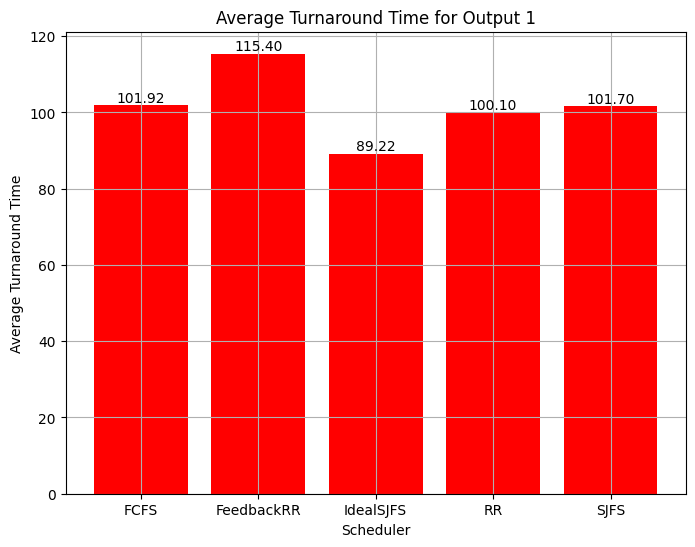

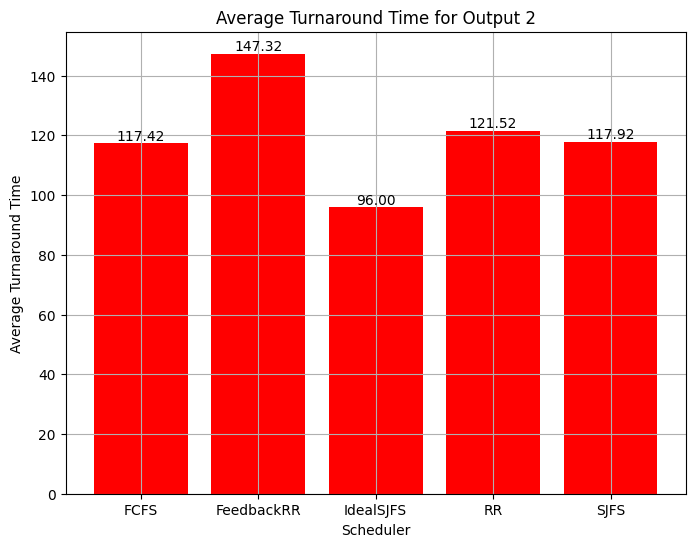

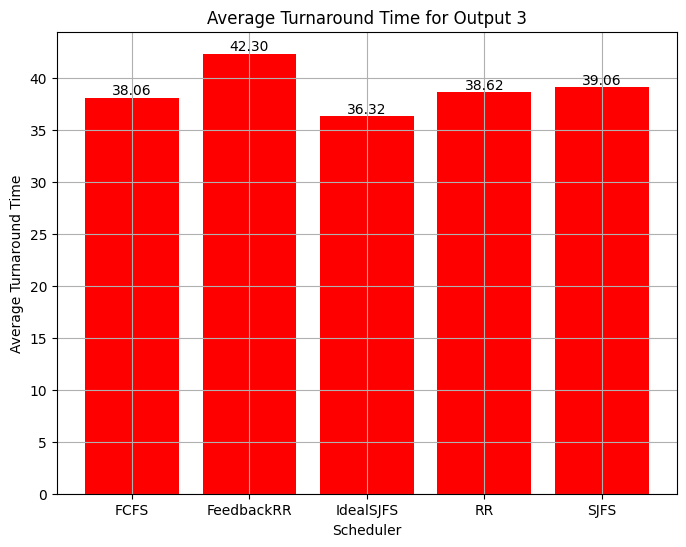

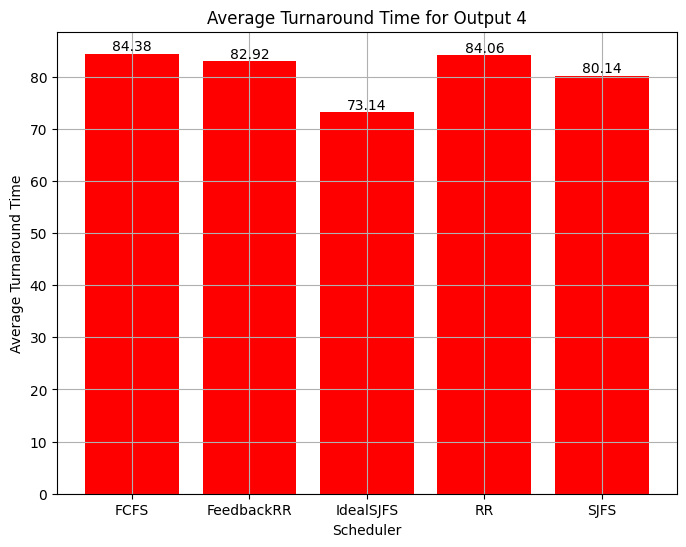

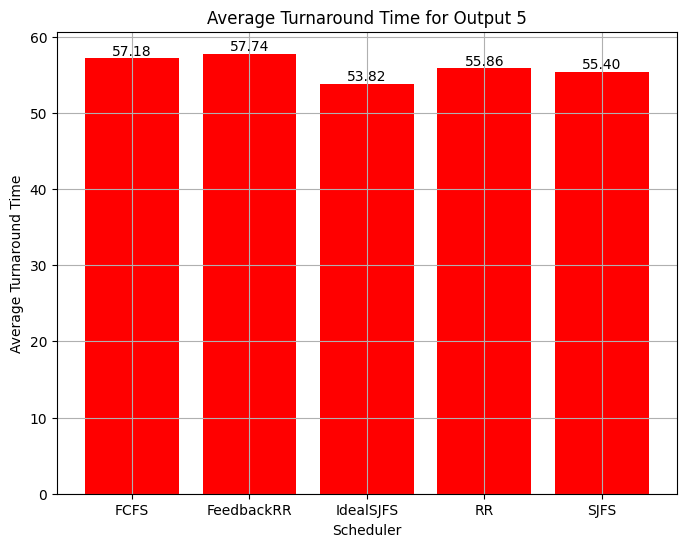

In [3]:
scheduler_types = {1: 'FCFS', 2: 'FeedbackRR', 3: 'IdealSJFS', 4: 'RR', 5: 'SJFS'}
scheduler_avg_times = {scheduler_types[i]: [] for i in range(1, 6)}

def plot_average_turnaround_time(file_paths, outputs):
    avg_turnaround_times = []

    for i, file_path in enumerate(file_paths, start=1):
        data_frame = pd.read_csv(file_path, sep='\t')

        # we don't want to use ID 0 as it's just an idle process
        data_frame_filtered = data_frame[data_frame['id'] != 0]

        avg_turnaround_time = data_frame_filtered['turnaroundTime'].mean()
        avg_turnaround_times.append(avg_turnaround_time)

        # adds the average turnaround time to scheduler_avg_times dictionary so we can use it to calculate the overall mean later 
        scheduler_type = scheduler_types[(i - 1) % 5 + 1]
        scheduler_avg_times[scheduler_type].append(avg_turnaround_time)

    # plot the graph
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(scheduler_avg_times) + 1), [avg_turnaround_times[i % 5] for i in range(len(scheduler_avg_times))], color='red')
    plt.xlabel('Scheduler')
    plt.ylabel('Average Turnaround Time')
    plt.title(f'Average Turnaround Time for Output {outputs}')

    plt.xticks(range(1, len(scheduler_avg_times) + 1), [scheduler_types[i] for i in range(1, 6)])
    plt.grid(True)

    # shows the calculated values above the bars
    for i, avg_turnaround_time in enumerate(avg_turnaround_times):
        plt.text(i + 1, avg_turnaround_time, f'{avg_turnaround_time:.2f}', ha='center', va='bottom')

    plt.show()

# loops through each scheduler with the paths I have provided
file_paths = []
for i in range(1, 6):
    file_paths.extend([
        f'../../../experiment2/outputs/scheduler1/output{i}.out',
        f'../../../experiment2/outputs/scheduler2/output{i}.out',
        f'../../../experiment2/outputs/scheduler3/output{i}.out',
        f'../../../experiment2/outputs/scheduler4/output{i}.out',
        f'../../../experiment2/outputs/scheduler5/output{i}.out'
    ])

    plot_average_turnaround_time(file_paths, i)
    file_paths = []


**Discussion:**

As you can see, the graphs clearly show that adjusting the parameters to give all schedulers a fair chance has been effective. In all five graphs, the differences between them are very different. However, I expected some reduction in discrepancies, but not to this extent. Let's analysis why that is, and I will use Output 2 which exhibits the most variation among schedulers. I will be taking the outputs in the Output2 file and draw a Gantt Chart of each process where the x axis will be time and the y axis will be the process ID. Each bar would represent the turnaround time (createdTime to terminatedTime) for that process which will show why they Average Turnaround Time is so similar. I have chosen Gantt Chart mainly due to the fact in Lectures where they used Gantt Charts to showed us examples of schdeulers and process which was simple and easy to understand.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Brief Explanition of the Code below**:

* A list called `file_paths` is defined, containing the file paths for each output file.

* A list called `scheduler_types` is defined, containing the scheduler types for labels.

* Subplots are created for each scheduler using plt.subplots, resulting in a 5x1 grid of subplots with shared x-axis and a specified figure size.

* Loops through each file path and index using `enumerate(file_paths)`.

* Within the loop, it reads each output file into a pandas DataFrame with tab-separated values using `pd.read_csv`.

* Rows with ID 0 are filtered out from the DataFrame.

* A list called `data_frames` is created to store DataFrames for each task.

* Another loop iterates through the filtered DataFrame, creating a DataFrame for each task with columns `ID`, `Start`, and `Finish`, and appends it to the `data_frames list`.

* DataFrames in the `data_frames` list are concatenated row-wise into a single DataFrame called `gantt_data_frame`.

* For the current scheduler, bars are plotted on the corresponding subplot using `axs[i].barh`, representing the time interval from `Start` to `Finish` for each task.

* The appearance of each subplot is customised by setting labels, titles, and grid.

* A common label is added to the figure using `fig.text` to indicate that the bars represent the turnaround Time (createdTime to terminatedTime).

* Layout adjustments are made using `plt.tight_layout()`.

* The Gantt charts are displayed using `plt.show()`.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

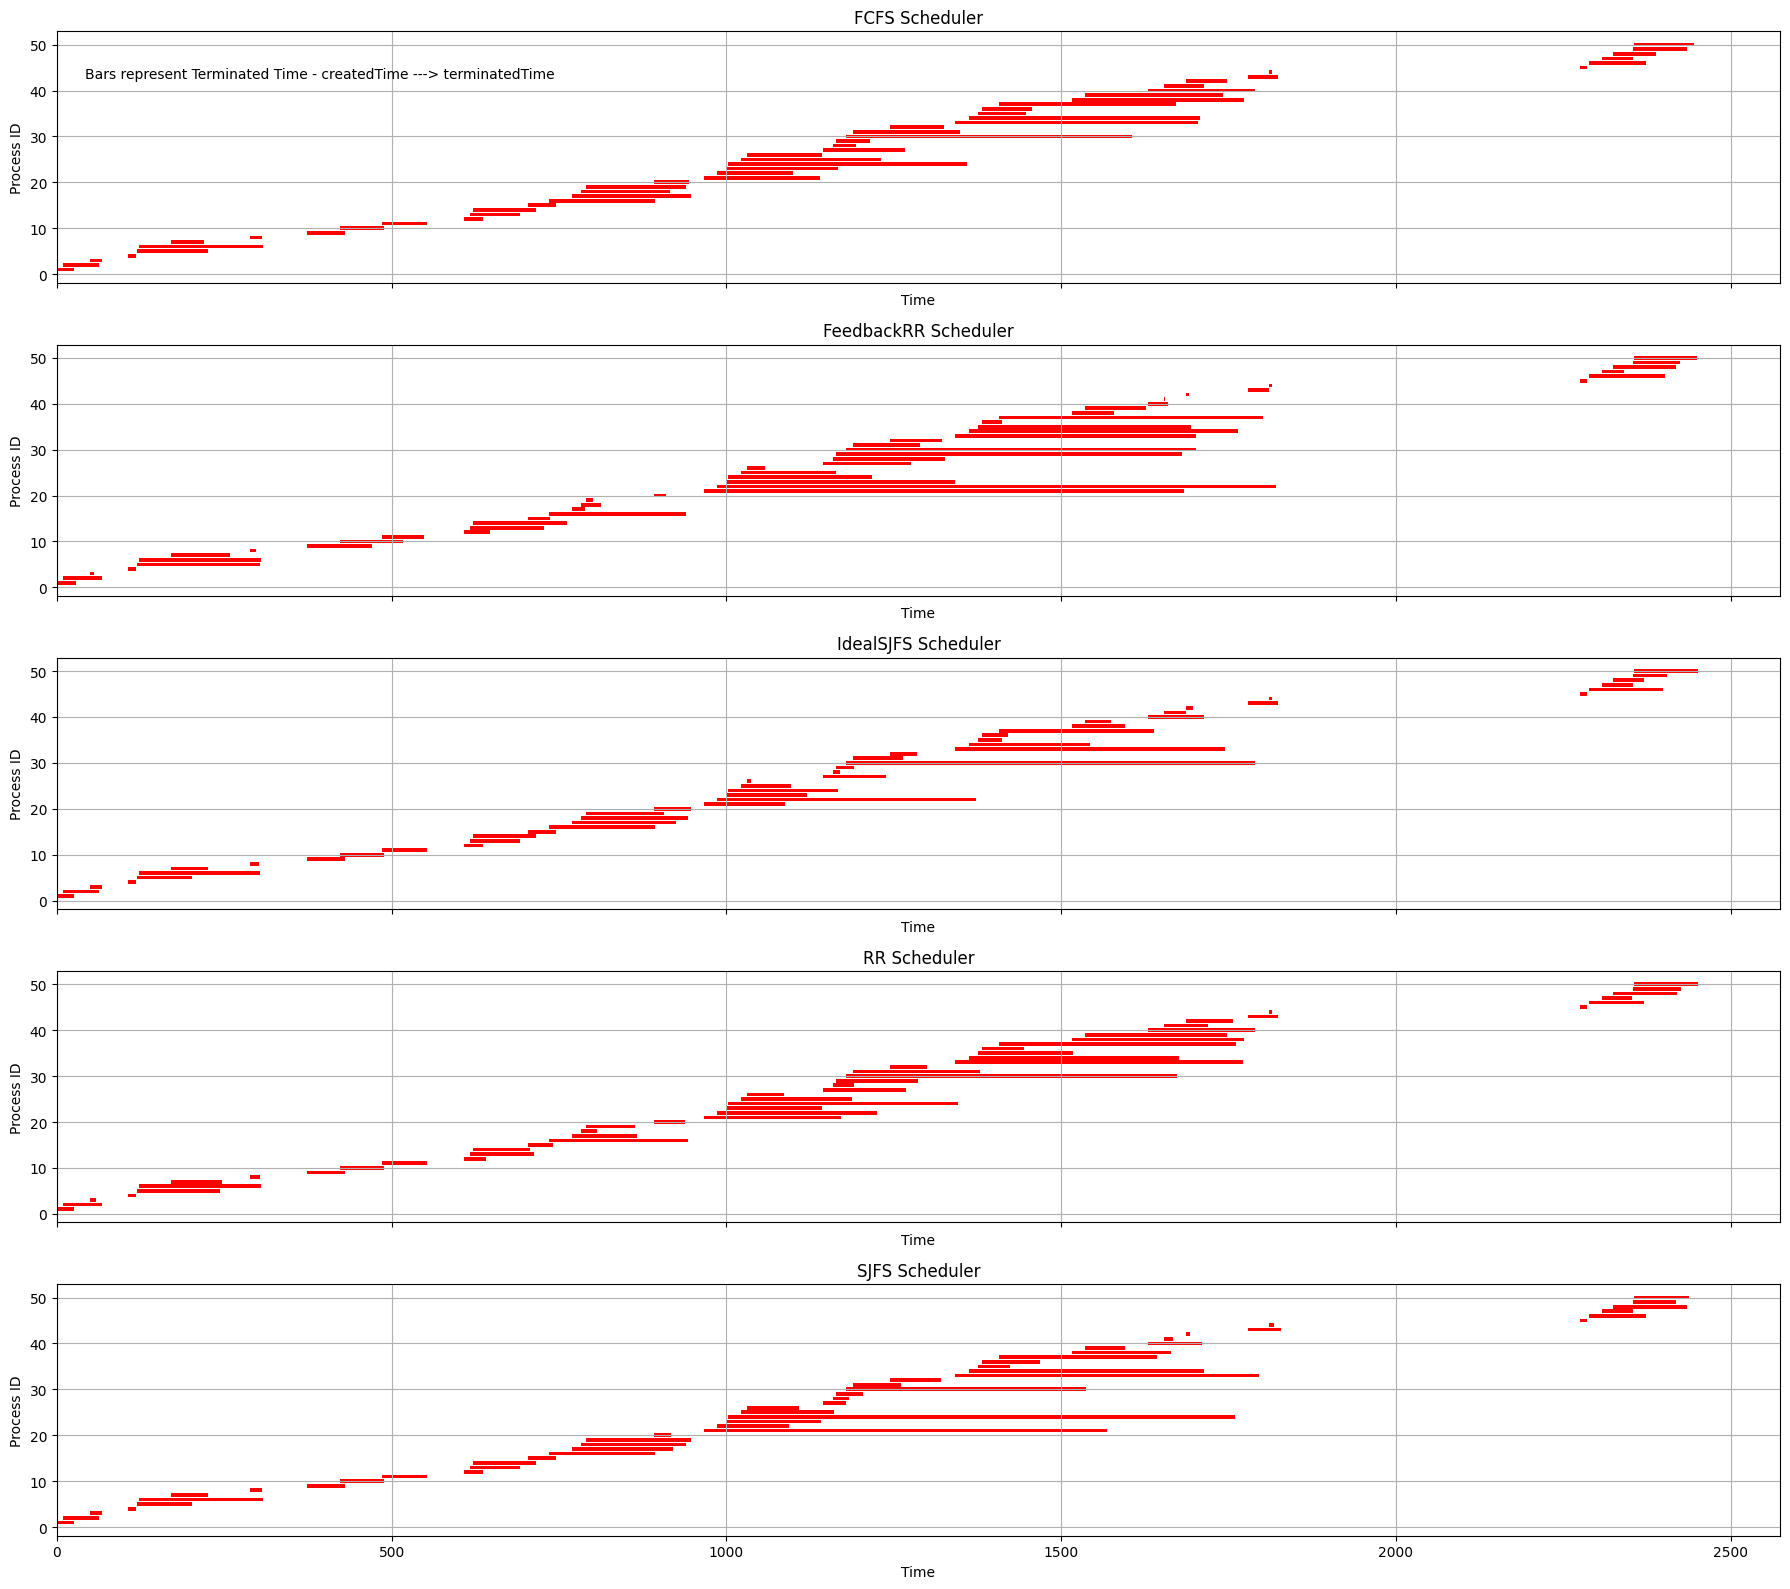

In [4]:
file_paths = [
    "../../../experiment2/outputs/scheduler1/output2.out",
    "../../../experiment2/outputs/scheduler2/output2.out",
    "../../../experiment2/outputs/scheduler3/output2.out",
    "../../../experiment2/outputs/scheduler4/output2.out",
    "../../../experiment2/outputs/scheduler5/output2.out"
]

scheduler_types = ['FCFS', 'FeedbackRR', 'IdealSJFS', 'RR', 'SJFS']

fig, axs = plt.subplots(5, 1, figsize=(18, 16), sharex=True)

for i, file_path in enumerate(file_paths):
    data_frame = pd.read_csv(file_path, sep='\t')
    
    # we don't want to use ID 0 as it's just an idle process
    data_frame_filtered = data_frame[data_frame['id'] != 0]
    
    data_frames = []

    for index, row in data_frame_filtered.iterrows():
        task_data_frame = pd.DataFrame({'ID': [row['id']], 'Start': [row['createdTime']], 'Finish': [row['terminatedTime']]})
        data_frames.append(task_data_frame)

    gantt_data_frame = pd.concat(data_frames, ignore_index=True)
    
    # plot bars for the current scheduler
    for index, row in gantt_data_frame.iterrows():
        axs[i].barh(y=row['ID'], width=row['Finish'] - row['Start'], left=row['Start'], color='red')

    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Process ID')
    axs[i].set_title(f'{scheduler_types[i]} Scheduler')
    axs[i].grid(True)

fig.text(0.05, 0.95, 'Bars represent Terminated Time - createdTime ---> terminatedTime', va='center', ha='left')

plt.tight_layout()

plt.show()


**Discussion:**

As evident from the results above, all of the schedulers exhibit remarkable similarity, with some major differences in the central part of the Gantt Charts (between 750 - 1700). It's noticeable that all of the Gantt Charts show a staircase-shaped trend. This serves as a compelling illustration of why the bar graphs representing the average turnaround time for each scheduler were also very different yet very similar (following the same trend, a staircase-shaped). Furthermore, distinct characteristics of each scheduler can be identified when multiple tasks are being handled simultaneously. This is evident in the central part of the Gantt Charts (between 750 - 1700), where different schedulers exhibit varying behaviors. These minor differences contribute to certain schedulers having a higher or lower average turnaround time.

One key detail I would like to point out is that the Feedback Round Robin has got the highest average turnaround time in every seed which was expected. However, I also expected Round Robin to be similar or equally have a high average turnaround time. One of the reasons which I believe that this has occured is due to the FeedbackRR scheduler adjusts priorities or time slices based on feedback, it may result in more frequent context switches between processes. Context switching overhead can become more pronounced under heavy workload, as the scheduler manages numerous processes competing for CPU time. This increased context switching can contribute to longer turnaround times. Addiontionally, with theses results I have gathered, I can tell that the overall average turnaround time will be higher for FeedbackRR compared to Round Robin and the other schedulers.

Now, let's proceed to examine the overall average turnaround time for each scheduler to determine which one has the highest and lowest average turnaround time under a heavy workload. As I hypothesised earlier, I believe that the Shortest Job First Scheduler (SJFS) and the IdealSJFS will have the lowest average turnaround times, while the Feedback Round Robin (FeedbackRR) and Round Robin (RR) will have the highest. I'll use a similar code from the one used in Experiment 1 to calculate the average turnaround time of the schedulers overall.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Brief Explanition of the Code below**:

* `scheduler_avg_means_turnaround` is a dictionary initialised to store the average turnaround time for each scheduler.

* Iterate through the `scheduler_avg_times` dictionary, which holds the turnaround times for each scheduler across experiments.

* Compute the average turnaround time for each scheduler by adding up the turnaround times and dividing by the number of experiments.

* Store the computed average turnaround time in the `scheduler_avg_means_turnaround` dictionary.

* Create a bar graph using `plt.bar()` where each bar represents a scheduler, and its height reflects the mean turnaround time.

* Add labels and a title to the graph for clarity.

* Annotate each bar with its corresponding mean turnaround time using `plt.text()`.

* Show the plotted bar graph illustrating the overall average turnaround time for each scheduler.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

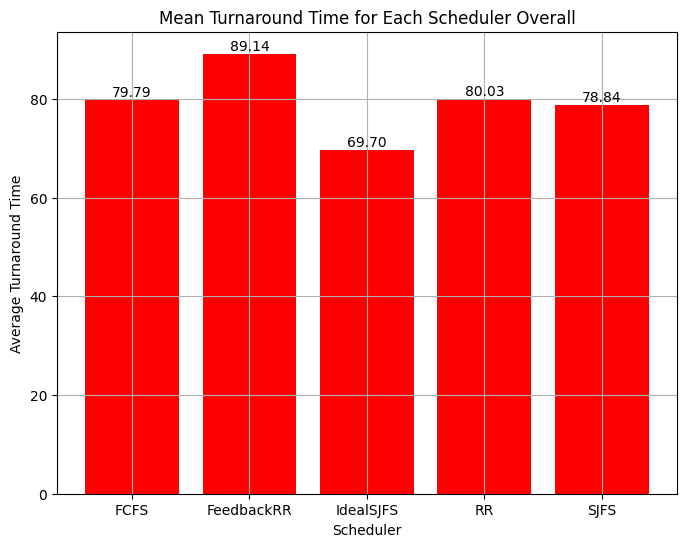

In [5]:

scheduler_avg_means_turnaround = {}

# calculates the average turnaround time for each scheduler
for scheduler, times in scheduler_avg_times.items():
    avg_time = sum(times) / len(times)
    scheduler_avg_means_turnaround[scheduler] = avg_time

# plot the graph for average turnaround time for each scheduler
plt.figure(figsize=(8, 6))
bars = plt.bar(scheduler_avg_means_turnaround.keys(), scheduler_avg_means_turnaround.values(), color='red')
plt.xlabel('Scheduler')
plt.ylabel('Average Turnaround Time')
plt.title('Mean Turnaround Time for Each Scheduler Overall')
plt.grid(True)

# shows the calculated values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

**Threats to Validity**

* **Assuming Fairness Seeds:** While random seed selection aims to minimise biases, the choice of seeds could still influence the results. Certain seeds might inadvertently favor particular schedulers due to the sequence of processes generated, potentially leading to unrepresentative outcomes.

* **Assuming Fairness in Parameter Selection:** The reasoning behind parameter choices, such as selecting interrupt time, time quantum, and etc, presupposes fairness among scheduling algorithms. However, fairness criteria may differ among algorithms, and establishing fair parameter values can be subjective. This subjectivity could inadvertently favour certain schedulers over others, thereby introducing bias into the evaluation process.

* **Human Error:** A crucial aspect is the dependence on the accurate coding and execution of the experiments. Any mistakes or inaccuracies in the coding process or the conduct of the experiments could have a significant impact on the results. Thus, it is essential to ensure thorough coding and careful execution to minimise the potential for introducing substantial errors into the analysis.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion:**

As can be observed above, the IdealSJF Schdeuler as well as the Shortest Job First Schdeuler has the lowest average turnaround time overall and the 2 Round Robin Schedulers (Round Robin as well as the Feedback Round Robin) has the highest. This proves that my hypothesis was in fact correct as well as my reasonigs behind it once again. By selecting the shortest job first, SJF prioritises processes that require the least amount of CPU time to complete. This minimises the waiting time for other processes in the ready queue, as shorter jobs tend to finish faster, allowing subsequent jobs to start execution sooner.

In Round Robin scheduling, assigning a large time quantum can lead to inefficient CPU usage, particularly for longer processes. Perhaps 20 units as the time quantum is too high for it to be able to compete with other schdeulers.Additionaly, Feedback Round Robin dynamically adjusts the time quantum based on process priority, which improves fairness and responsiveness. However, this adjustment can result in longer turnaround times for lower priority processes compared to higher priority ones.

# Experiment 3: Which Scheduler is the best and which one is the worst when unexpected processes arises WHILE adapting to the workload changing constantly?

**Hypothesis:**

For this experiment, I'm trying to figure out which Schedulers would be the best and worst when dealing with unexpected processes while there is a constant change in the worldload. This mainly to test what it would be like in the real world where there is a constant chnage in workload as well as unxpected processes. 

I believe be Shortest Job First (SJF) could be one of the best in this experiment due to the fact While IdealSJF may not be practical due to its requirement for perfect knowledge of processing times, a variant of SJF that could be effective. In SJF, the scheduler selects the process with the shortest expected processing time next. Although it may not handle unexpected processes well, in a scenario where the workload is predictable and processes have relatively stable execution times, SJF could still provide efficient scheduling. I'll be selecting SJF as my number 1

I believe that First Come, First Served (FCFS) is a simple scheduling algorithm that executes processes based on their arrival time. While it may not be optimal for handling unexpected processes or changing workloads, it ensures fairness in terms of the order of execution. If the experiment requires a straightforward approach and fairness is a primary concern, FCFS could be considered as my number 2.

Among the listed options, Feedback Round Robin (FeedbackRR) stands out because it incorporates multiple queues with varying time quantum sizes. This approach allows processes to move between different queues based on their execution behavior, such as how frequently they require CPU time. FeedbackRR can adapt somewhat to changing workloads and varying process requirements, making it potentially suitable for scenarios with unexpected processes and dynamic workloads. However, with all of these positives, with the paramters I have used in this experiment, I believe it will do the poorly due the choice of timeQuantum as well as the interrupt time. So this will be the 2nd Worst in my opinion. 

Finally, I think that Round Robin (RR) would be the worst. RR may struggle to manage unexpected processes and dynamic workloads effectively. While RR aims to maintain fairness by allotting a fixed time slice to each process, it doesn't have the capability to interrupt processes that exceed their allotted time. Consequently, if unexpected processes with longer execution times appear, they could monopolize the CPU, leading to delays in executing other processes in the queue.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Methodology:**

To assess which scheduler is the best and the worst, I will conduct the experiment using the run.bat script. This script will execute the experiment for each scheduler. Five different seeds will be selected for each scheduler to compare over various different sectors which will be the average waiting time, the average turnaround time and the average response time. Inputs generated by the batch file will be stored in ../../../experiment3/inputs/, while the simulator parameters utilised will be stored in ../../../experiment3/schedulers/simulator_parameters/. Outputs will be saved in ../../../experiment3/outputs/scheduler[1...5]/.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Input Parameters:**

* numberOfProcesses=30
* staticPriority=0
* meanInterArrival=20.0
* meanCpuBurst=5.0
* meanIOBurst=35.0
* meanNumberBursts=5.0
* seed=

Seeds used for this Experiments are 442683052450597, 605494619412730, 184758416469283, 214218561663227, and 639581754026573.

The input parameters specified above are intended to generate input data characterised by unpredictability, stemming from the substantial variation in CPU and IO burst times across a large number of processes. By opting for a high inter-arrival time, the goal is to minimise strain on the scheduler, focusing instead on assessing its performance under conditions where the workload's nature is unknown. This exploration aims to shed light on potential strategies for enhancing burst time estimation, particularly in the context of highly unpredictable workloads.

To uphold fairness, seeds are selected randomly. This approach minimises biases and ensures that each trial is treated impartially. It facilitates an objective evaluation of each scheduler's performance under different conditions.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Simulator Parameters:**

* timeLimit=10000
* periodic=false
* interruptTime=10
* timeQuantum=20
* initialBurstEstimate=20
* alphaBurstEstimate=0.75

The alphaBurstEstimate controls the rate at which burst time estimates adapt to changing conditions. A higher alpha value results in faster adaptation, allowing schedulers to respond more quickly to workload variations. With 20 as the initialBurstEstimate will influences the scheduler's ability to adapt to changing workload conditions.

In essence, by adjusting the parameters in a way that gives all schedulers a chance in this experiemnt and employing random seed selection, we enchace the reliability of our results. This methodology enables us to gather insights into how schedulers perform across various scenarios.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Brief Explanition of the Code below**:


* A dictionary `scheduler_types` is initialised to map numerical scheduler IDs to their corresponding names.

* An empty dictionary `scheduler_avg_response_times` is created to store the average response times for each scheduler.

* The `plot_average_response_time` function is defined to calculate and plot the average response time for each scheduler.

* It takes a list of file paths and an output index as inputs.

* Within the function, it iterates through each file path provided, reads each output file into a DataFrame, and filters out rows with ID 0.

* For each scheduler, it calculates the average response time from the responseTime column of the DataFrame and appends it to the `avg_response_times list`.

* After processing all output files, the function plots a bar graph using Matplotlib to visualise the average response time for each scheduler.

* Each scheduler is represented on the x-axis, and its corresponding average response time is plotted on the y-axis.

* The scheduler names are labeled on the x-axis, and their respective average response times are annotated on the bars.

* The main loop iterates through each scheduler and output index, calls the `plot_average_response_time` function, and resets the `file_paths` list for the next iteration.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

In [6]:
scheduler_types = {1: 'FCFS', 2: 'FeedbackRR', 3: 'IdealSJFS', 4: 'RR', 5: 'SJFS'}
scheduler_avg_times = {scheduler_types[i]: [] for i in range(1, 6)}

def plot_average_response_time(file_paths, outputs):
    avg_response_times = []

    for i, file_path in enumerate(file_paths, start=1):
        data_frame = pd.read_csv(file_path, sep='\t')

        # we don't want to use ID 0 as it's just an idle process
        data_frame_filtered = data_frame[data_frame['id'] != 0]

        avg_response_time = data_frame_filtered['responseTime'].mean()
        avg_response_times.append(avg_response_time)

        # adds the average response time to scheduler_avg_times dictionary so we can use it to calculate the overall mean later 
        scheduler_type = scheduler_types[(i - 1) % 5 + 1]
        scheduler_avg_times[scheduler_type].append(avg_response_time)

    # plot the graph
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(scheduler_avg_times) + 1), [avg_response_times[i % 5] for i in range(len(scheduler_avg_times))], color='green')
    plt.xlabel('Scheduler')
    plt.ylabel('Average Response Time')
    plt.title(f'Average Response Time for Output {outputs}')

    plt.xticks(range(1, len(scheduler_avg_times) + 1), [scheduler_types[i] for i in range(1, 6)])
    plt.grid(True)

    # shows the calculated values above the bars
    for i, avg_response_time in enumerate(avg_response_times):
        plt.text(i + 1, avg_response_time, f'{avg_response_time:.2f}', ha='center', va='bottom')

    plt.show()



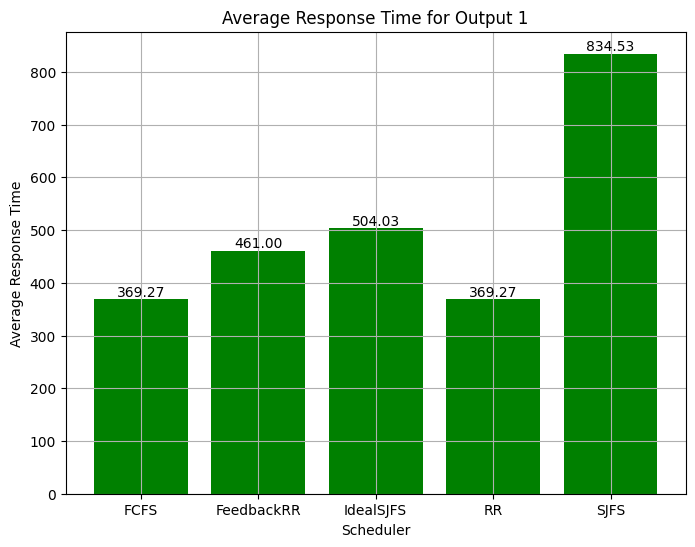

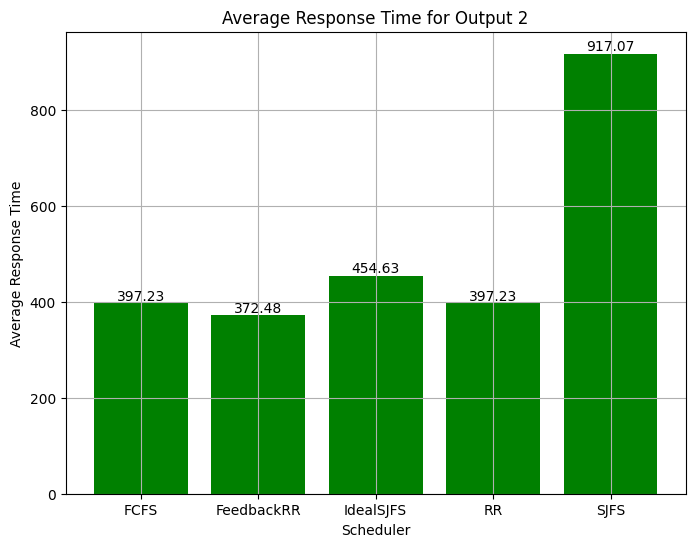

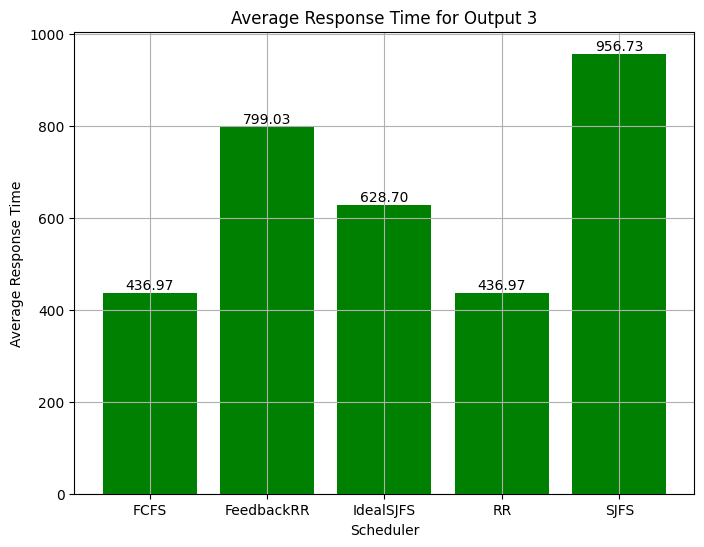

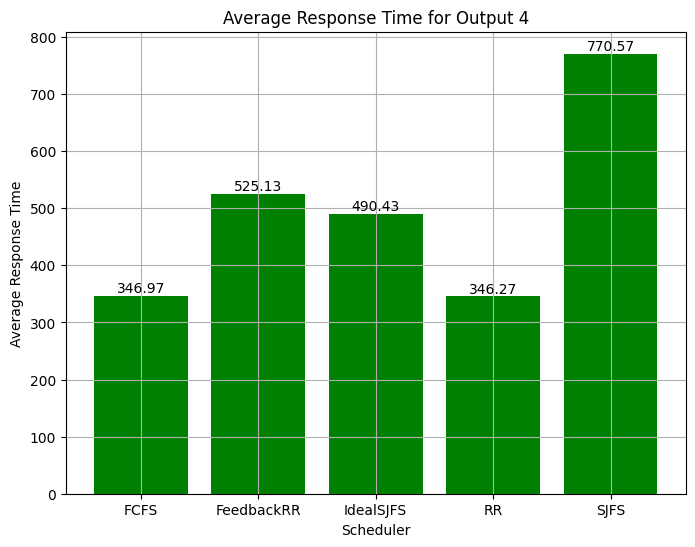

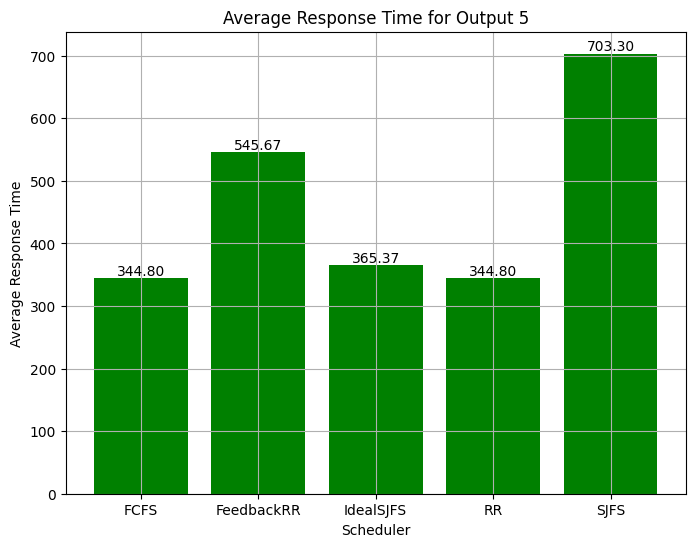

In [7]:

scheduler_types = {1: 'FCFS', 2: 'FeedbackRR', 3: 'IdealSJFS', 4: 'RR', 5: 'SJFS'}
scheduler_avg_times = {scheduler_types[i]: [] for i in range(1, 6)}

# loops through each scheduler with the paths I have provided
file_paths = []
for i in range(1, 6):
    file_paths.extend([
        f'../../../experiment3/outputs/scheduler1/output{i}.out',
        f'../../../experiment3/outputs/scheduler2/output{i}.out',
        f'../../../experiment3/outputs/scheduler3/output{i}.out',
        f'../../../experiment3/outputs/scheduler4/output{i}.out',
        f'../../../experiment3/outputs/scheduler5/output{i}.out'
    ])

    plot_average_response_time(file_paths, i)
    file_paths = []

**Brief Explanition of the Code below**:

* An empty dictionary named `scheduler_avg_means_response` to store the average response time for each scheduler.

* Iterate through the `scheduler_avg_times` dictionary, which contains the response times for each scheduler across experiments.

* Calculate the average response time for each scheduler by summing up the response times and dividing by the number of experiments.

* Store the computed average response time in the `scheduler_avg_means_response` dictionary.

* Create a bar graph using `plt.bar()`, where each bar represents a scheduler, and its height reflects the mean response time.

* Add labels and a title to the graph for clarity.

* Annotate each bar with its corresponding mean response time using `plt.text()`.

* Display the plotted bar graph illustrating the overall average response time for each scheduler.


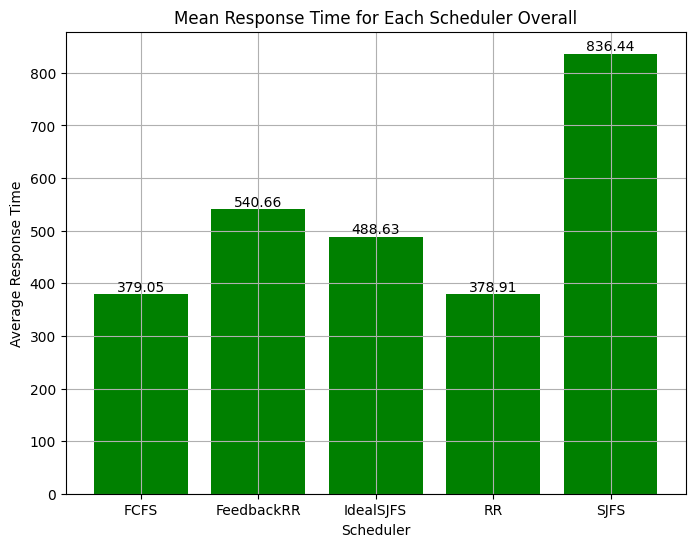

In [8]:
scheduler_avg_means_response = {}

# calculates the average response time for each scheduler
for scheduler, times in scheduler_avg_times.items():
    avg_time = sum(times) / len(times)
    scheduler_avg_means_response[scheduler] = avg_time

# plot the graph for average response time for each scheduler
plt.figure(figsize=(8, 6))
bars = plt.bar(scheduler_avg_means_response.keys(), scheduler_avg_means_response.values(), color='green')
plt.xlabel('Scheduler')
plt.ylabel('Average Response Time')
plt.title('Mean Response Time for Each Scheduler Overall')
plt.grid(True)

# shows the calculated values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

**Discussion:**

First-Come, First-Served (FCFS): FCFS operates on the principle of serving tasks in the order they arrive, making it simple to implement and understand. However, this simplicity comes at a cost, especially in scenarios with unexpected processes and varying workloads. If longer tasks arrive early in the queue or if there's a sudden surge in incoming tasks, FCFS may lead to increased response times. Tasks are processed sequentially, meaning longer tasks can delay the execution of subsequent ones, resulting in potentially longer wait times for newer tasks.

FeedbackRR (Feedback Round Robin): FeedbackRR introduces a more complex scheduling mechanism by employing multiple queues with varying priorities. Tasks move between queues based on their execution history, allowing for adaptability in handling different task types. However, this adaptability can also lead to higher response times, particularly if tasks frequently cycle through lower-priority queues due to multiple iterations. In scenarios with unexpected processes, the constant re-evaluation of task priorities may introduce additional overhead, contributing to longer response times.

IdealSJFS (Ideal Shortest Job First): IdealSJFS prioritises the execution of shorter tasks to minimise response times optimally. Even in dynamic environments, where unexpected processes and varying workloads are prevalent, IdealSJFS tends to maintain relatively low response times compared to other schedulers. By consistently favouring shorter tasks, IdealSJFS effectively reduces response times and enhances overall system efficiency. However, it's essential to note that achieving this ideal scenario may be challenging in real-world environments with diverse task characteristics and unpredictable arrivals.

Round Robin (RR) employs a simple strategy of assigning fixed time slices to tasks, which promotes fairness and prevents task starvation. In dynamic environments characterised by unexpected processes, RR often achieves shorter response times relative to other scheduling algorithms. This is attributed to its consistent allocation of CPU time to each task, ensuring timely execution and maintaining relatively low response times across tasks. However, longer tasks may encounter more frequent interruptions if their execution surpasses the assigned time slice, potentially resulting in heightened response times for these tasks. It's worth noting that RR operates on a non-preemptive basis, meaning tasks cannot be forcibly interrupted once started, which may influence its effectiveness in managing varying workloads.

SJFS (Shortest Job First): SJFS prioritises the execution of shorter tasks ahead of longer ones, aiming to minimise response times effectively. However, in scenarios with unexpected processes, SJFS may encounter longer response times compared to other schedulers. This occurs because longer tasks may be delayed in favour of shorter ones, leading to potential wait times and increased response times for longer tasks. While SJFS excels in minimising response times for shorter tasks, its performance may vary depending on the task mix and arrival patterns in dynamic environments.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

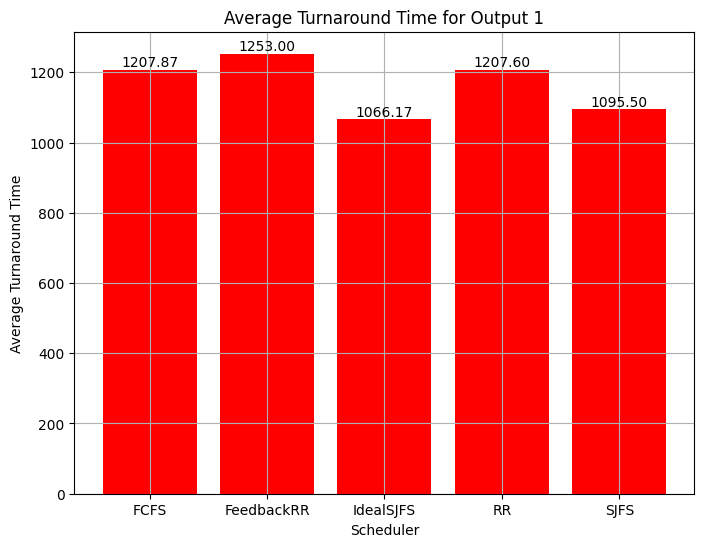

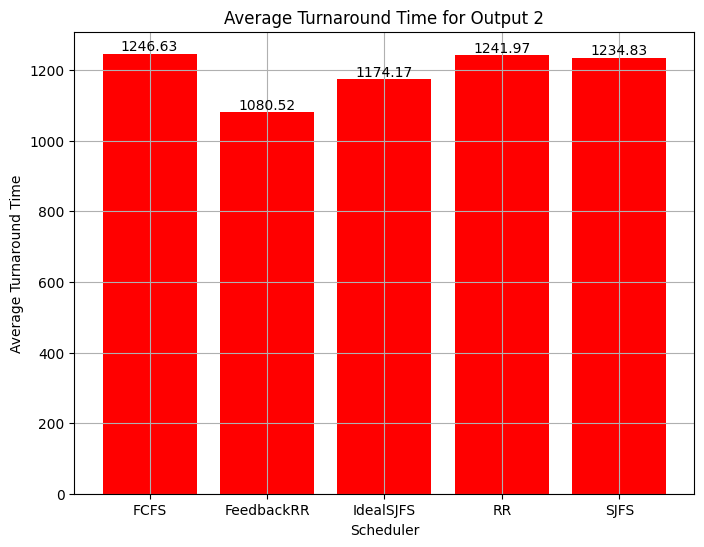

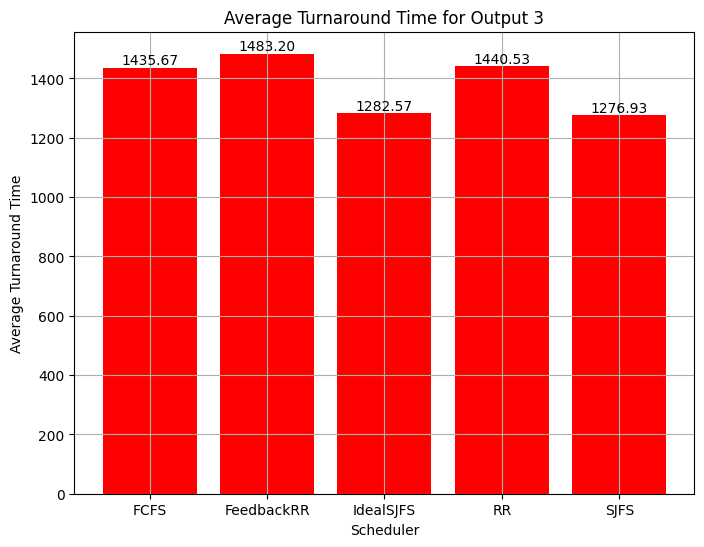

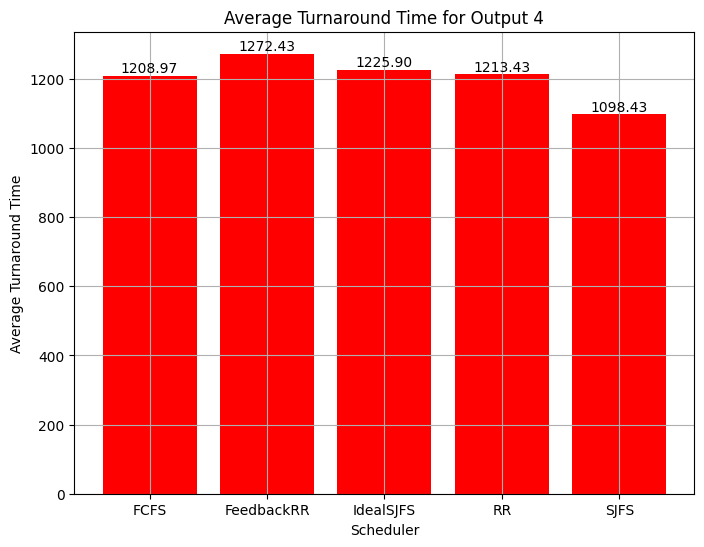

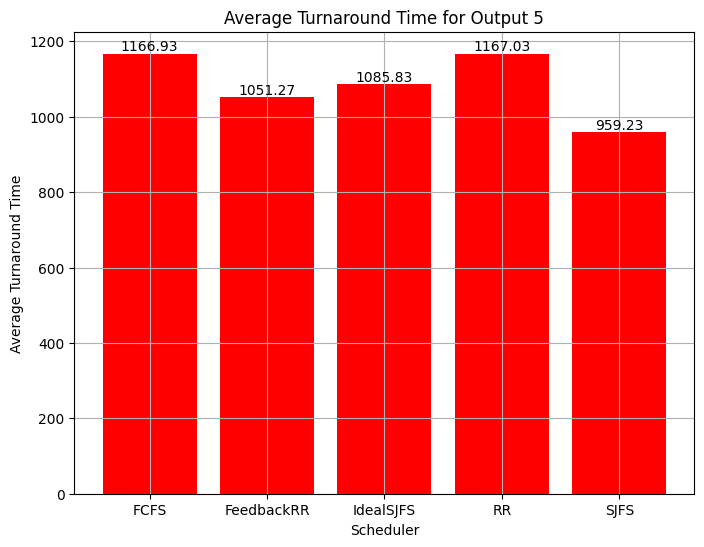

In [9]:
scheduler_types = {1: 'FCFS', 2: 'FeedbackRR', 3: 'IdealSJFS', 4: 'RR', 5: 'SJFS'}
scheduler_avg_times = {scheduler_types[i]: [] for i in range(1, 6)}

# loops through each scheduler with the paths I have provided
file_paths = []
for i in range(1, 6):
    file_paths.extend([
        f'../../../experiment3/outputs/scheduler1/output{i}.out',
        f'../../../experiment3/outputs/scheduler2/output{i}.out',
        f'../../../experiment3/outputs/scheduler3/output{i}.out',
        f'../../../experiment3/outputs/scheduler4/output{i}.out',
        f'../../../experiment3/outputs/scheduler5/output{i}.out'
    ])

    plot_average_turnaround_time(file_paths, i)
    file_paths = []

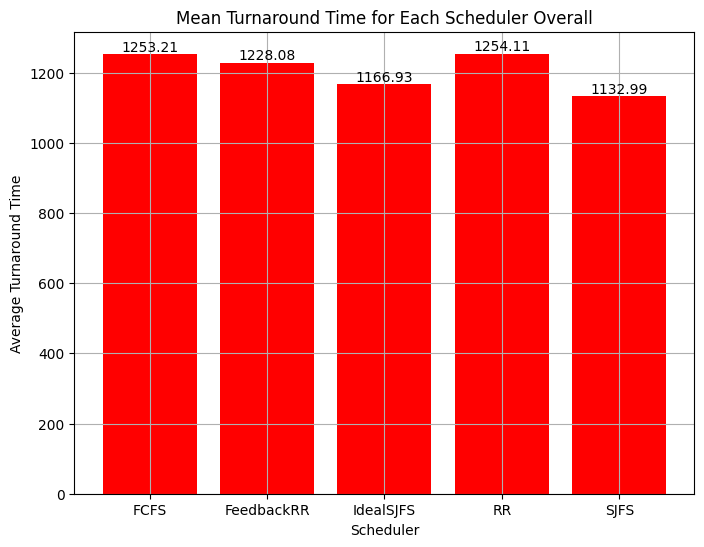

In [10]:
# calculates the average turnaround time for each scheduler
for scheduler, times in scheduler_avg_times.items():
    avg_time = sum(times) / len(times)
    scheduler_avg_means_turnaround[scheduler] = avg_time

# plot the graph for average turnaround time for each scheduler
plt.figure(figsize=(8, 6))
bars = plt.bar(scheduler_avg_means_turnaround.keys(), scheduler_avg_means_turnaround.values(), color='red')
plt.xlabel('Scheduler')
plt.ylabel('Average Turnaround Time')
plt.title('Mean Turnaround Time for Each Scheduler Overall')
plt.grid(True)

# shows the calculated values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

**Discussion:**

FCFS (First-Come, First-Served): FCFS processes tasks strictly in the order they arrive. While this approach is simple and easy to implement, it may lead to longer turnaround times when faced with unexpected processes or a dynamic workload. Longer tasks that arrive early in the queue or a sudden influx of new tasks can cause FCFS to prioritise them over shorter ones, resulting in increased turnaround times.

FeedbackRR (Feedback Round Robin): FeedbackRR dynamically adjusts task priorities based on their execution history. Preemptive scheduling allows FeedbackRR to adapt quickly to changes in workload and prioritise shorter tasks, leading to relatively stable turnaround times. However, the overhead of continuously adjusting task priorities may slightly increase turnaround times compared to non-preemptive approaches.

IdealSJFS (Ideal Shortest Job First): IdealSJFS prioritises the execution of shorter tasks to minimise turnaround times optimally. In scenarios with unexpected processes and varying workloads, IdealSJFS remains effective due to its consistent prioritisation of shorter tasks. This approach helps mitigate the impact of longer tasks and fluctuations in workload, resulting in relatively low turnaround times.

RR (Round Robin): RR allocates fixed time slices to tasks but does not interrupt them once they start executing. While this ensures fairness in CPU allocation, it may lead to longer turnaround times in dynamic environments. Interruptions caused by unexpected processes or workload variations can disrupt the execution order, resulting in delays and higher turnaround times compared to preemptive approaches like FeedbackRR.

SJFS (Shortest Job First): SJFS prioritises shorter tasks to minimise turnaround times efficiently. However, in scenarios with unexpected processes and varying workloads, SJFS may face challenges if longer tasks are frequently interrupted. Interruptions can disrupt the execution of longer tasks, leading to longer turnaround times compared to preemptive approaches like FeedbackRR and IdealSJFS. Overall, SJFS may struggle to maintain optimal turnaround times in dynamic environments due to its non-preemptive nature and focus on shorter tasks.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

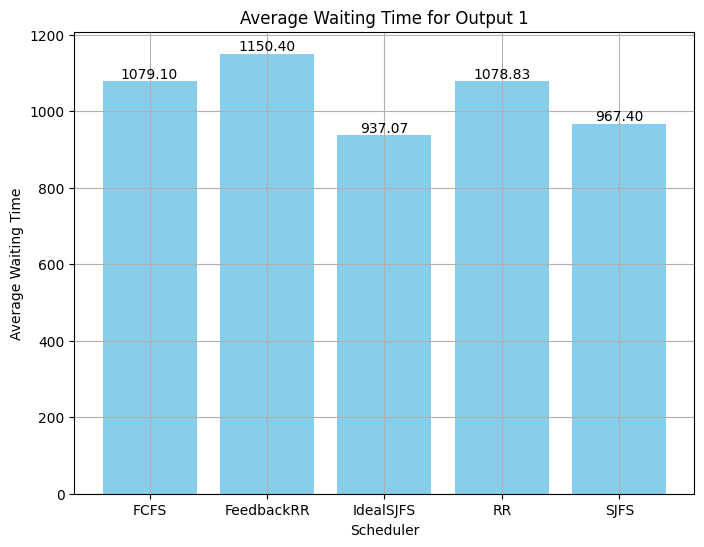

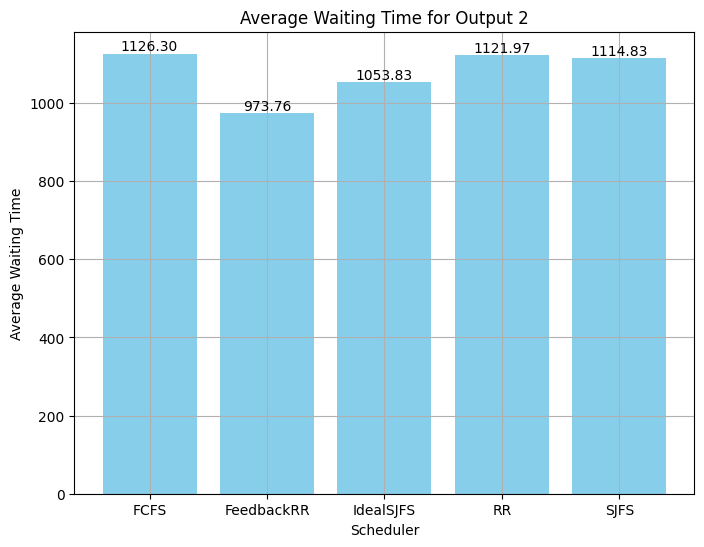

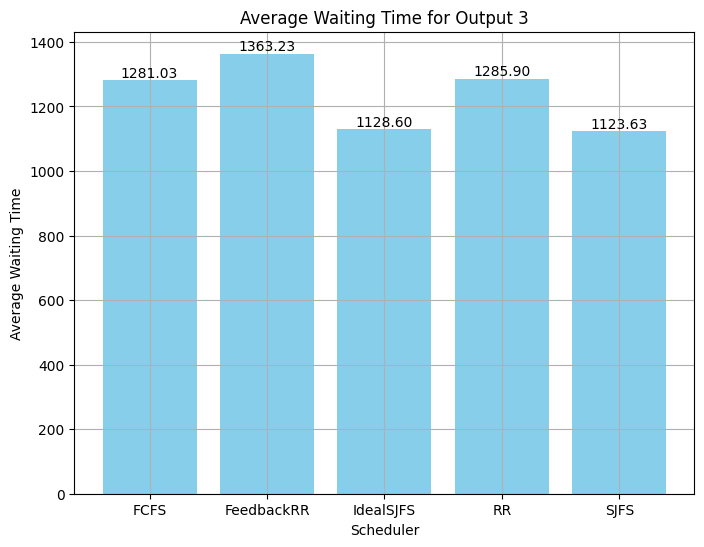

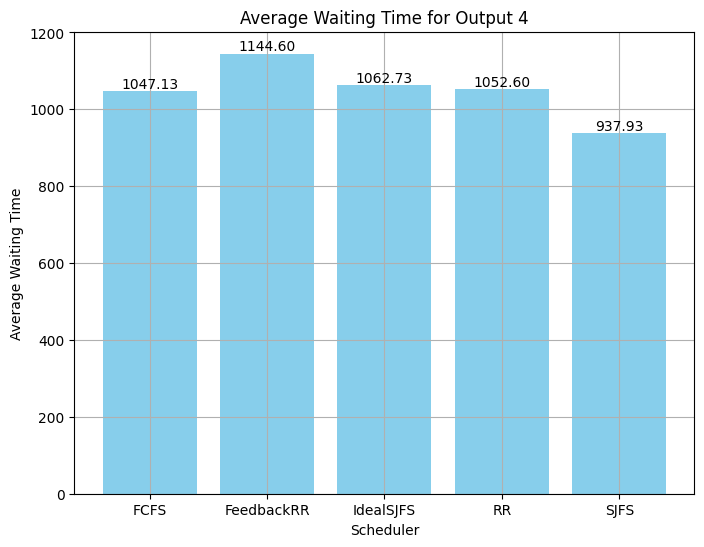

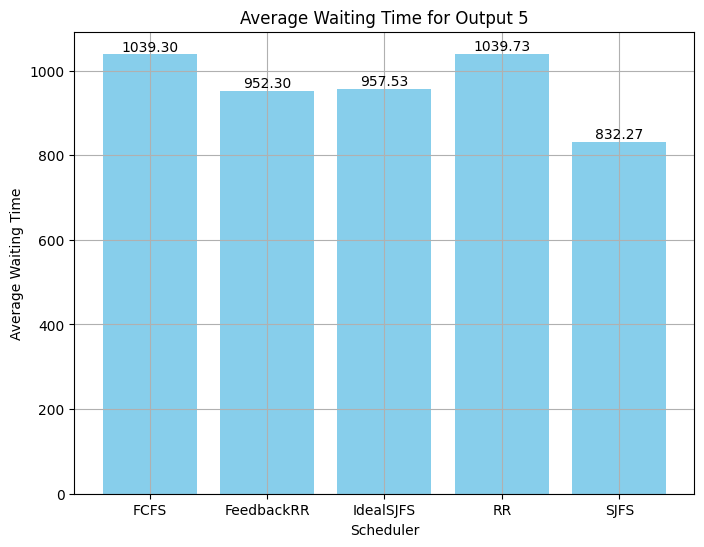

In [11]:
scheduler_types = {1: 'FCFS', 2: 'FeedbackRR', 3: 'IdealSJFS', 4: 'RR', 5: 'SJFS'}
scheduler_avg_times = {scheduler_types[i]: [] for i in range(1, 6)}

file_paths = []
for i in range(1, 6):
    file_paths.extend([
        f'../../../experiment3/outputs/scheduler1/output{i}.out',
        f'../../../experiment3/outputs/scheduler2/output{i}.out',
        f'../../../experiment3/outputs/scheduler3/output{i}.out',
        f'../../../experiment3/outputs/scheduler4/output{i}.out',
        f'../../../experiment3/outputs/scheduler5/output{i}.out'
    ])

    plot_average_waiting_time(file_paths, i)
    file_paths = []

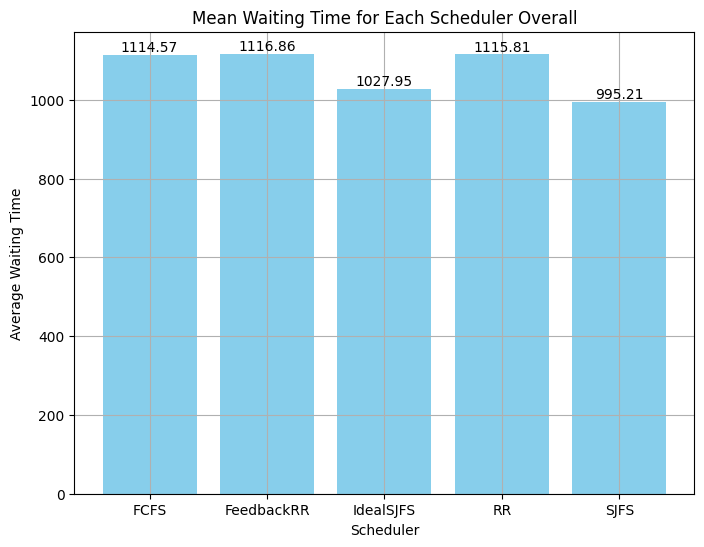

In [12]:
scheduler_avg_means_waiting = {}

# calculates the average waiting time for each scheduler
for scheduler, times in scheduler_avg_times.items():
    avg_time = sum(times) / len(times)
    scheduler_avg_means_waiting[scheduler] = avg_time

# plot the graph for average waiting time for each scheduler
plt.figure(figsize=(8, 6))
bars = plt.bar(scheduler_avg_means_waiting.keys(), scheduler_avg_means_waiting.values(), color='skyblue')
plt.xlabel('Scheduler')
plt.ylabel('Average Waiting Time')
plt.title('Mean Waiting Time for Each Scheduler Overall')
plt.grid(True)

# shows the calculated values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


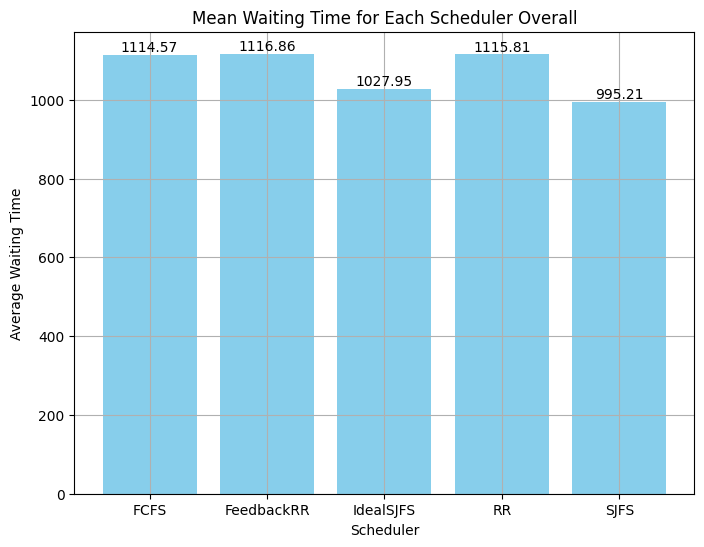

In [13]:
scheduler_avg_means_waiting = {}

# calculates the average waiting time for each scheduler
for scheduler, times in scheduler_avg_times.items():
    avg_time = sum(times) / len(times)
    scheduler_avg_means_waiting[scheduler] = avg_time

# plot the graph for average waiting time for each scheduler
plt.figure(figsize=(8, 6))
bars = plt.bar(scheduler_avg_means_waiting.keys(), scheduler_avg_means_waiting.values(), color='skyblue')
plt.xlabel('Scheduler')
plt.ylabel('Average Waiting Time')
plt.title('Mean Waiting Time for Each Scheduler Overall')
plt.grid(True)

# shows the calculated values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

**Discussion:**

FCFS (First-Come, First-Served): In FCFS, tasks are executed in the order they arrive, without interruption. However, in scenarios with unexpected tasks and changing workloads, FCFS may lead to longer waiting times. If longer tasks arrive early or if new tasks disrupt the established order, FCFS could end up waiting longer to execute tasks, resulting in higher average waiting times.

FeedbackRR (Feedback Round Robin): FeedbackRR dynamically adjusts task priorities based on their execution history. Shorter tasks start in lower-priority queues and move up as needed, ensuring prompt execution while maintaining fairness. This adaptability allows FeedbackRR to efficiently handle unexpected tasks and varying workloads, resulting in lower average waiting times compared to FCFS.

IdealSJFS (Ideal Shortest Job First): IdealSJFS prioritises shorter tasks to minimise waiting times and optimise resource utilisation. In scenarios with unexpected tasks and changing workloads, IdealSJFS can efficiently handle tasks by prioritising shorter ones, resulting in lower average waiting times compared to FCFS.

RR (Round Robin): RR allocates fixed time slices to tasks but cannot interrupt them once they start executing. While this ensures fairness in CPU allocation, it may lead to longer waiting times in dynamic environments. Interruptions caused by unexpected tasks or changing workloads can disrupt the execution order, resulting in delays and higher average waiting times compared to FeedbackRR and IdealSJFS.

SJFS (Shortest Job First): SJFS prioritises shorter tasks to minimise waiting times and make efficient use of resources. However, in scenarios with unexpected tasks and changing workloads, SJFS may face challenges if longer tasks are frequently interrupted. Interruptions can disrupt the execution of longer tasks, leading to longer average waiting times compared to FeedbackRR and IdealSJFS.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Brief Explanition of the Code below**:

* Import the necessary module `table` from `pandas.plotting`.

* Define a list `scheduler_types` containing different schedulers.

* Create DataFrames `response_data_frame`, `waiting_data_frame`, and `turnaround_data_frame` from dictionaries `scheduler_avg_means_response`, `scheduler_avg_means_waiting`, and `scheduler_avg_means_turnaround`, respectively, with scheduler names as indices and average times as columns.

* Concatenate the three DataFrames along the columns axis to create `table_data_frame`, with columns for Scheduler, Average Response Time, Average Waiting Time, and Average Turnaround Time.

* Add a column 'Scheduler' to `table_data_frame` containing scheduler types.

* Rearrange the columns of `table_data_frame` to have Schedulers first.

* Create a subplot `fig` with no visible axis, suitable for the table plot.

* Use the `table()` function to plot the table with cell data from `table_data_frame`, column labels from `table_data_frame.columns`, and center alignment.

* Display the plot.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**RESULTS**:

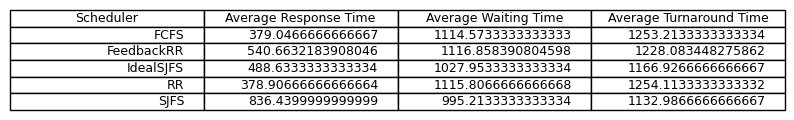

In [14]:
from pandas.plotting import table

scheduler_types = ['FCFS', 'FeedbackRR', 'IdealSJFS', 'RR', 'SJFS']

response_data_frame = pd.DataFrame.from_dict(scheduler_avg_means_response, orient='index', columns=['Average Response Time'])
waiting_data_frame = pd.DataFrame.from_dict(scheduler_avg_means_waiting, orient='index', columns=['Average Waiting Time'])
turnaround_data_frame = pd.DataFrame.from_dict(scheduler_avg_means_turnaround, orient='index', columns=['Average Turnaround Time'])

table_data_frame = pd.concat([response_data_frame, waiting_data_frame, turnaround_data_frame], axis=1)

table_data_frame['Scheduler'] = scheduler_types

table_data_frame = table_data_frame[['Scheduler', 'Average Response Time', 'Average Waiting Time', 'Average Turnaround Time']]

# plots the table using pandas plot_table
fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('off')
ax.table(cellText=table_data_frame.values, colLabels=table_data_frame.columns, loc='center')

plt.show()


**Threats to Validity**

* **Assuming Fairness Seeds:** While random seed selection aims to minimise biases, the choice of seeds could still influence the results. Certain seeds might inadvertently favor particular schedulers due to the sequence of processes generated, potentially leading to unrepresentative outcomes.

* **Assuming Fairness in Parameter Selection:** The reasoning behind parameter choices, such as selecting interrupt time, time quantum, and etc, presupposes fairness among scheduling algorithms. However, fairness criteria may differ among algorithms, and establishing fair parameter values can be subjective. This subjectivity could inadvertently favour certain schedulers over others, thereby introducing bias into the evaluation process.

* **Human Error:** A crucial aspect is the dependence on the accurate coding and execution of the experiments. Any mistakes or inaccuracies in the coding process or the conduct of the experiments could have a significant impact on the results. Thus, it is essential to ensure thorough coding and careful execution to minimise the potential for introducing substantial errors into the analysis.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion:**

**Ranking BEST to WORST**

From my hypothesis, I would say I was some what correct with my predictions. However, I did not expect the Ideal Shortest Job First (IdealSJF) to do as well as the Shortest Job First (SFJ). My expections with both the Round Robin and the Feedback Round Robin were correct that it would'nt do too well in this experiment because of the choice in my parameters. However, now looking back at this, perhaps maybe a different parameter choices could have gave them a better chance at this experiment. Maybe in the future I will adjust these parameters in a way to see what effects they would have in my own time. These statements I made are supported by the table above where you can see the numeric value for each schedulers that I got. Now lets getting to the ranking.


The ranking provided is derived from the analysis based on the comparisons made above, as well as the observed differences in performance indicated by the bar graphs. It is important to note that this ranking reflects the relative effectiveness of each scheduler in handling unexpected processes and constantly changing workloads. However, it is essential to acknowledge that there isn't any equations or metric linking these factors that may help to the assess this experiment. Therefore, while this ranking offers valuable insights into the comparative performance of the scheduler, it's important to consider the complex nature of real-world scenarios and the potential impact of additional factors not explicitly captured in the analysis.

1) IdealSJFS (Ideal Shortest Job First): IdealSJFS prioritises shorter tasks to optimise resource utilisation and minimise waiting times effectively. Even in dynamic environments with unexpected processes and varying workloads, IdealSJFS tends to maintain relatively low response times compared to other schedulers. By consistently favouring shorter tasks, IdealSJFS enhances overall system efficiency and responsiveness.

2) SJFS (Shortest Job First): SJFS prioritises shorter tasks to minimise waiting times, but it may encounter longer response times in dynamic environments with unexpected processes. Longer tasks may be delayed in favour of shorter ones, leading to potential wait times and increased response times for longer tasks. While SJFS excels in minimising response times for shorter tasks, its performance may vary depending on the task mix and arrival patterns in dynamic environments.

3) FCFS (First-Come, First-Served): FCFS processes tasks strictly in the order they arrive, which can lead to longer waiting times in scenarios with unexpected processes and changing workloads. If longer tasks arrive early or disrupt the established order, FCFS may result in increased response times due to sequential task processing.

4) Round Robin (RR): RR allocates fixed time slices to tasks, promoting fairness and preventing task starvation. In dynamic environments, RR often achieves shorter response times relative to other schedulers due to its consistent allocation of CPU time to each task. While longer tasks may experience occasional delays if their execution exceeds the assigned time slice, RR generally maintains low and consistent response times across tasks.

5) FeedbackRR (Feedback Round Robin): FeedbackRR dynamically adjusts task priorities based on their execution history, allowing for adaptability in handling different task types. However, this adaptability may lead to higher response times, particularly if tasks frequently cycle through lower-priority queues due to multiple iterations. In scenarios with unexpected processes, the constant re-evaluation of task priorities may introduce additional overhead, contributing to longer response times.
